In [1]:
import numpy as np
import pandas as pd
pd.set_option("display.max_columns", 300)
pd.set_option("max_colwidth", 200)

from sklearn.linear_model import LinearRegression
from sklearn.linear_model import HuberRegressor
from sklearn.linear_model import Ridge
from sklearn.linear_model import RidgeCV
from sklearn.linear_model import Lasso
from sklearn.linear_model import LassoCV
from sklearn.linear_model import ElasticNet
from numpy import arange
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import GradientBoostingRegressor
from xgboost import XGBRegressor

from sklearn import preprocessing

from sklearn.metrics import mean_squared_error, r2_score
from sklearn.feature_selection import SequentialFeatureSelector

from sklearn.model_selection import train_test_split
from sklearn.model_selection import KFold

import matplotlib.pyplot as plt
import statistics

import seaborn as sns

In [2]:
MLR = pd.read_csv('MLR_Scores.csv')

In [3]:
MLR

,MLR
0,0.918063
1,0.921468
2,0.917458
3,0.901348
4,0.880215
...,...
78,0.916311
79,0.875548
80,0.816474
81,0.875929


In [4]:
R = pd.read_csv('Ridge_Scores.csv')
R

,Ridge
0,0.922324
1,0.904080
2,0.873341
3,0.927122
4,0.927237
...,...
95,0.925941
96,0.891703
97,0.928015
98,0.908410


In [5]:
RA = pd.read_csv('Ridge(Alpha)_Scores.csv')
RA

,Ridge(Alpha)
0,0.872675
1,0.833784
2,0.913389
3,0.915791
4,0.922588
...,...
95,0.865711
96,0.825523
97,0.850263
98,0.921203


In [6]:
L = pd.read_csv('Lasso_Scores.csv')
L

,Lasso
0,0.922000
1,0.870393
2,0.904947
3,0.935329
4,0.923573
...,...
95,0.920464
96,0.865681
97,0.921771
98,0.854886


In [7]:
LA = pd.read_csv('Lasso(Alpha)_Scores.csv')
LA

,Lasso(Alpha)
0,0.917257
1,0.918043
2,0.834550
3,0.821591
4,0.924398
...,...
95,0.894337
96,0.881202
97,0.883672
98,0.923469


In [8]:
EN = pd.read_csv('EN_Scores.csv')
EN

,ElasticNet(A=1)
0,0.900951
1,0.897153
2,0.893508
3,0.858141
4,0.861584
...,...
95,0.889731
96,0.904851
97,0.845491
98,0.894342


In [9]:
RFNOBS = pd.read_csv('RF_NO_BS_Scores.csv')
RFNOBS

,RF No Bootstrap
0,0.802505
1,0.812802
2,0.804253
3,0.788075
4,0.798382
...,...
95,0.728658
96,0.832974
97,0.722284
98,0.816047


In [10]:
RFWBS = pd.read_csv('RF_W_BS_Scores.csv')
RFWBS

,RF With Bootstrap
0,0.887632
1,0.887489
2,0.862341
3,0.894374
4,0.875895
...,...
95,0.898318
96,0.857231
97,0.895881
98,0.861978


In [11]:
GB = pd.read_csv('GB_Scores.csv')
GB

,Gradient Boost
0,0.887317
1,0.903090
2,0.920209
3,0.918222
4,0.836273
...,...
95,0.855921
96,0.927833
97,0.915311
98,0.862950


In [12]:
XGB = pd.read_csv('XGB_Scores.csv')
XGB

,Xtreme Boost
0,0.892172
1,0.893983
2,0.876358
3,0.825427
4,0.880499
...,...
95,0.911735
96,0.905428
97,0.914559
98,0.909119


In [13]:
combo = pd.concat([MLR, R, RA, L, LA, EN, RFNOBS, RFWBS, GB, XGB], axis=1)

In [14]:
type(combo)

pandas.core.frame.DataFrame

In [15]:
combo.to_csv('Combo.csv', index=False)

In [16]:
combo.describe()

,MLR,Ridge,Ridge(Alpha),Lasso,Lasso(Alpha),ElasticNet(A=1),RF No Bootstrap,RF With Bootstrap,Gradient Boost,Xtreme Boost
count,83.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000
mean,0.892633,0.910799,0.897149,0.900776,0.899633,0.885093,0.784647,0.886632,0.898488,0.891751
std,0.031614,0.020566,0.028785,0.029828,0.027584,0.019753,0.032155,0.021303,0.033551,0.023146
min,0.814978,0.852682,0.805836,0.806346,0.821591,0.840808,0.688679,0.821929,0.789802,0.825427
25%,0.872822,0.903043,0.876957,0.877813,0.878001,0.868820,0.763088,0.871947,0.868282,0.882889
50%,0.907675,0.918965,0.909637,0.912124,0.910687,0.889445,0.788275,0.892419,0.910472,0.899664
75%,0.916707,0.925761,0.918278,0.922299,0.920328,0.899980,0.809023,0.902028,0.923651,0.908018
max,0.929679,0.936399,0.933672,0.935329,0.933560,0.922647,0.839172,0.920475,0.938693,0.924327


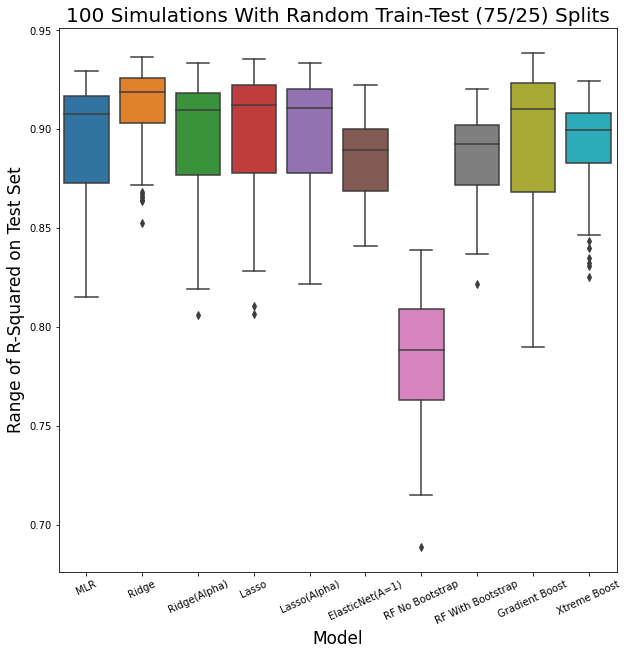

In [17]:
plt.figure(figsize=(10,10))
plt.title('100 Simulations With Random Train-Test (75/25) Splits', fontsize=20)
plt.ylabel('Range of R-Squared on Test Set', fontsize=17)
plt.xlabel('Model', fontsize=17)
sns.boxplot(data=combo)
plt.xticks(rotation=25);

In [18]:
Negative_MLR = pd.read_csv('MLR_Negative_R2.csv')
Negative_MLR

,MLR Negative R2
0,-5.104574e+04
1,-1.870687e+04
2,-8.089481e+01
3,-2.332168e+03
4,-1.549102e+07
5,-7.881828e+03
6,-3.449368e+06
7,-1.099951e+04
8,-4.151292e+03
9,-1.074843e+07
